In [19]:
import pandas as pd

# Load the sales data from CSV into a Pandas DataFrame
sales_data = pd.read_csv('sales_data.csv')

In [20]:
# Display the first few rows of the DataFrame to understand its structure
print("Sample Data:")
display(sales_data.head())

Sample Data:


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [21]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [22]:
#checking for null values
sales_data.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [23]:
#statistical analysis
sales_data.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [24]:
# Data Cleaning: Handling missing values and data types
sales_data['Date'] = pd.to_datetime(sales_data['Date'])  # Convert 'Date' column to datetime

In [25]:
# Data Analysis
# Calculate total sales revenue for each product
sales_data['Total Sales'] = sales_data['Order_Quantity'] * sales_data['Revenue']

In [26]:
# Determine the best-selling product and its quantity sold
best_selling_product = sales_data.groupby('Product').sum()['Order_Quantity'].idxmax()
total_quantity_sold = sales_data.groupby('Product').sum()['Order_Quantity'].max()

In [27]:
print("\nBest Selling Product:", best_selling_product)
print("Quantity Sold:", total_quantity_sold)



Best Selling Product: Water Bottle - 30 oz.
Quantity Sold: 164086


In [28]:
# Identify sales trends over time (monthly)
sales_data['Month'] = sales_data['Date'].dt.month
monthly_sales = sales_data.groupby('Month').sum()['Total Sales']

In [29]:

print("\nMonthly Sales:")
print(monthly_sales)


Monthly Sales:
Month
1     45805918
2     42881762
3     46421194
4     48209439
5     53590843
6     55443083
7     40563089
8     43750455
9     44678276
10    45590692
11    45321844
12    59894253
Name: Total Sales, dtype: int64


In [30]:
# Analyze sales performance across different regions or customer segments (if available)

# Data Visualization (optional)
import matplotlib.pyplot as plt

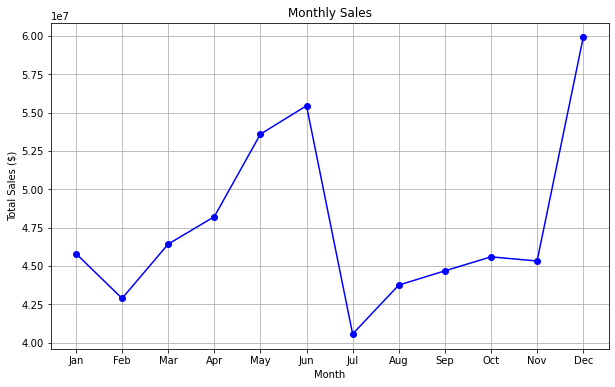

In [31]:
# Monthly Sales Plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='blue')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()